In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('costsummarydayl1_201908301107.csv')
df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,12,13,14,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ys_tenant_uuid,ys_billingfilename,ys_billingmonth,timedim,payeraccountid,linkedaccountid,productname,usagetype,ys_usagetype,ys_usagetypegroup,...,ys_resourceid,ys_all_tags,ys_attributes,reservedinstance,ys_tenancytype,ys_reservedusagetype,ys_usagequantity,ys_reservedusagequantity,run_timestamp,ys_amortizedcost
0,9ce3e72e31b44e188d92f1d2e4758458,819983868943-aws-billing-detailed-line-items-w...,201804,2018-04-23,819983868943,819983868943,Amazon Elastic Compute Cloud,BoxUsage:c5.large,c5.large,Instance,...,879b263592416c392df4eb3f750a302b3aac2fcf,"{""aws:autoscaling:groupName"":""beta-s3config-AS...",{},N,default,NaN,0.191944,0.191944,2018-10-09 11:26:39,0.0
1,9ce3e72e31b44e188d92f1d2e4758458,819983868943-aws-billing-detailed-line-items-w...,201804,2018-04-23,819983868943,819983868943,Amazon Elastic Compute Cloud,BoxUsage:t2.small,t2.small,Instance,...,d81578e13ef96fe336f4ec9e631e1be7ef1e6141,"{""aws:autoscaling:groupName"":""utilization-summ...",{},N,default,NaN,0.610000,0.610000,2018-10-09 11:26:39,0.0
2,9ce3e72e31b44e188d92f1d2e4758458,819983868943-aws-billing-detailed-line-items-w...,201804,2018-04-23,819983868943,819983868943,Amazon Elastic Compute Cloud,USE1-CAN1-AWS-In-Bytes,ys-data-in,Network,...,ed9a3eeabb946a28b79194756c84e100a41b39f2,"{""aws:autoscaling:groupName"":""inventory-proces...",{},N,NaN,NaN,0.000890,0.000890,2018-10-09 11:26:39,0.0
3,9ce3e72e31b44e188d92f1d2e4758458,819983868943-aws-billing-detailed-line-items-w...,201804,2018-04-23,819983868943,819983868943,Amazon Elastic Compute Cloud,USE1-EU-AWS-In-Bytes,ys-data-in,Network,...,ed9a3eeabb946a28b79194756c84e100a41b39f2,"{""aws:autoscaling:groupName"":""inventory-proces...",{},N,NaN,NaN,0.001676,0.001676,2018-10-09 11:26:39,0.0
4,9ce3e72e31b44e188d92f1d2e4758458,819983868943-aws-billing-detailed-line-items-w...,201804,2018-04-23,819983868943,819983868943,Amazon Elastic Compute Cloud,USE1-USW1-AWS-In-Bytes,ys-data-in,Network,...,2f619de01b3e71a4a4c08af75e3d91e3fbe51ac6,"{""aws:autoscaling:groupName"":""inventory-proces...",{},N,NaN,NaN,0.001531,0.001531,2018-10-09 11:26:39,0.0


In [2]:
df.shape

(11618068, 45)

In [3]:
df.columns.values

array(['ys_tenant_uuid', 'ys_billingfilename', 'ys_billingmonth',
       'timedim', 'payeraccountid', 'linkedaccountid', 'productname',
       'usagetype', 'ys_usagetype', 'ys_usagetypegroup', 'operation',
       'ys_operationgroup', 'availabilityzone', 'ys_instancetype',
       'ys_os', 'ys_region', 'ys_application', 'ys_owner', 'ys_role',
       'ys_cluster', 'ys_environment', 'ys_operatinghours', 'ys_project',
       'ys_customer', 'ys_costcenter', 'ys_compliance', 'ys_type',
       'usagequantity', 'unblendedcost', 'blendedcost', 'ys_updatedon',
       'itemdescription', 'blendedrate', 'unblendedrate', 'resourceid',
       'ys_resourceid', 'ys_all_tags', 'ys_attributes',
       'reservedinstance', 'ys_tenancytype', 'ys_reservedusagetype',
       'ys_usagequantity', 'ys_reservedusagequantity', 'run_timestamp',
       'ys_amortizedcost'], dtype=object)

In [7]:
#Import data
pd.options.display.float_format = "{:.5f}".format
df = pd.read_csv('costsummarydayl1_201908301107.csv')
df.timedim = pd.to_datetime(df.timedim)

#drop useless data
df = df.drop([ "ys_tenant_uuid","ys_billingmonth", "payeraccountid","run_timestamp", "ys_updatedon"], axis=1)
df = df.drop(["blendedcost", "ys_usagequantity", "ys_reservedusagequantity", "linkedaccountid","ys_role", 
              "ys_customer","ys_costcenter","ys_compliance", "availabilityzone", "ys_instancetype", "ys_os", 
              "ys_tenancytype", "ys_reservedusagetype","usagetype","ys_usagetype","ys_operationgroup"], axis=1)

#mapping perspective to the data
df['perspective'] = np.where(df['ys_operatinghours']=='ANALYTICS-PLATFORM','Analytics Platform',
                    np.where(df['ys_operatinghours']=='FORECASTING-AND-BUDGETING','Forecasting and Budgeting',
                    np.where(df['ys_operatinghours']=='INVENTORY-AND-TAG-MANAGEMENT','Inventory and Tag Management',
                    np.where(df['ys_operatinghours']=='INFRASTRUCTURE','Infrastructure',
                    np.where(df['ys_operatinghours']=='PLATFORM','Infrastructure',     
                    np.where(df['ys_operatinghours']=='WEB-APP','Webapp',
                    np.where(df['ys_operatinghours']=='COST-PROESSING','Cost Processing',
                    np.where(df['ys_operatinghours']=='UTILIZATION-ANALYTICS','Utilization Processing',
                    np.where(df['ys_operatinghours']=='DEVOPS','Devops',
                    np.where(df['ys_operatinghours']=='ANOMALY-DETECTION','Anomaly Detection',
                    np.where(df['ys_operatinghours']=='RECOMMENDATION','Recommendations',
                    np.where(df['ys_operatinghours']=='RECOMMENDATION-PROCESSING','Recommendations','Untagged'))))))))))))

df=df[df.unblendedcost>=0]
df=df[df.unblendedcost<df.unblendedcost.max()]
df=df[df.unblendedcost<=5*df.unblendedcost.std() + df.unblendedcost.mean()]
        
data = df.drop(['usagequantity'],axis=1)
data['ys_region'].fillna('Untagged', inplace=True)
data['operation'].fillna('Untagged', inplace=True)
#data aggregation to per product per perspective level: taking the mode of each feature
df = data.groupby(['timedim','productname','perspective']).agg({'unblendedcost':'sum','ys_usagetypegroup':lambda x: x.value_counts().index[0],'ys_application':lambda x: x.value_counts().index[0],'ys_owner':lambda x: x.value_counts().index[0],
                                                          'ys_cluster':lambda x: x.value_counts().index[0],'operation':lambda x: x.value_counts().index[0],'ys_region':lambda x: x.value_counts().index[0],'ys_environment':lambda x: x.value_counts().index[0],
                                                          'ys_operatinghours':lambda x: x.value_counts().index[0],'ys_project':lambda x: x.value_counts().index[0],'ys_type':lambda x: x.value_counts().index[0],'reservedinstance':lambda x: x.value_counts().index[0],
                                                               'productname':lambda x: x.value_counts().index[0],'perspective':lambda x: x.value_counts().index[0]})
df.shape

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,12,13,14,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9832, 14)

In [8]:
#one-hot encoding
data = pd.get_dummies(df)
#data['productname']=df.productname
#data['perspective']=df.perspective
encoded = list(data.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
data.head()

188 total features after one-hot encoding.


unblendedcost  \
timedim    productname                perspective                  
2018-01-01 AWS CloudTrail             Untagged           0.00000   
           AWS Key Management Service Untagged           0.06452   
           AWS Lambda                 Untagged           0.75242   
           AWS Support (Business)     Untagged           0.00000   
           AWS WAF                    Untagged           0.16129   

                                                   ys_usagetypegroup_Access  \
timedim    productname                perspective                             
2018-01-01 AWS CloudTrail             Untagged                            0   
           AWS Key Management Service Untagged                            0   
           AWS Lambda                 Untagged                            0   
           AWS Support (Business)     Untagged                            0   
           AWS WAF                    Untagged                            0   

                                                   ys_usagetypegroup_Instance  \
timedim    productname                perspective                               
2018-01-01 AWS CloudTrail             Untagged                              0   
           AWS Key Management Service Untagged                              0   
           AWS Lambda                 Untagged                              0   
           AWS Support (Business)     Untagged                              0   
           AWS WAF                    Untagged                              0   

                                                   ys_usagetypegroup_Network  \
timedim    productname                perspective                              
2018-01-01 AWS CloudTrail             Untagged                             0   
           AWS Key Management Service Untagged                             0   
           AWS Lambda                 Untagged                             0   
           AWS Support (Business)     Untagged                             0   
           AWS WAF                    Untagged                             0   

                                                   ys_usagetypegroup_Others  \
timedim    productname                perspective                             
2018-01-01 AWS CloudTrail             Untagged                            1   
           AWS Key Management Service Untagged                            1   
           AWS Lambda                 Untagged                            1   
           AWS Support (Business)     Untagged                            1   
           AWS WAF                    Untagged                            1   

                                                   ys_usagetypegroup_Storage  \
timedim    productname                perspective                              
2018-01-01 AWS CloudTrail             Untagged                             0   
           AWS Key Management Service Untagged                             0   
           AWS Lambda                 Untagged                             0   
           AWS Support (Business)     Untagged                             0   
           AWS WAF                    Untagged                             0   

                                                   ys_application_Jenkins,Nexus  \
timedim    productname                perspective                                 
2018-01-01 AWS CloudTrail             Untagged                                0   
           AWS Key Management Service Untagged                                0   
           AWS Lambda                 Untagged                                0   
           AWS Support (Business)     Untagged                                0   
           AWS WAF                    Untagged                                0   

                                                   ys_application_OpenVPN  \
timedim    productname                perspective                           
2018-01-01 AWS CloudTrail             Un

In [9]:
data.reset_index(inplace=True)
data = data.set_index(['productname','perspective'])
ori_column_num=data.shape[1]-1
ori_column_num

188

In [10]:
#divide the whole dataframe into dictionary, key is the perspective and product, value is the dataframe under this type
prob_pers_index=pd.DataFrame(data.index).drop_duplicates()
data_dict={}
for i in range(len(prob_pers_index)):
    temp_df=data.loc[prob_pers_index.iloc[i,0],:]
    temp_df.set_index('timedim',inplace=True)
    data_dict[prob_pers_index.iloc[i,0]]=temp_df
    #print(prob_pers_index.iloc[i,0],len(data_dict[prob_pers_index.iloc[i,0]]))

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [11]:
#number of timesteps to go back for feature engineering
def shift_series(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        if i>=len(dff):
            # if dataframe is not long enough, fill in with the last time period
            cols.append(dff.shift(len(dff)-1))
        else:
            cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        if i>=len(dff):
            cols.append(dff.shift(1-len(dff)))
        else:
            cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [12]:
t_period=7
multi_time_data_dict={}

# for every type (perspective x product), shift data to prepare features and labels
for key in data_dict.keys():
    temp=shift_series(data_dict[key],t_period,1)
    label_index=['var1(t-'+str(t_period-i-1)+')' for i in range(t_period-1)]+['var1(t)']
    label_data=temp.loc[:,label_index]
    label_data.columns=['y(t-'+str(t_period-i-1)+')' for i in range(t_period-1)]+['y(t)']
    temp.drop(temp.iloc[:,-ori_column_num:], axis=1, inplace=True)
    temp=pd.concat([temp,label_data],axis=1)
    #print(reframed_data.columns)
    multi_time_data_dict[key]=temp
    #print(key,len(temp))

In [13]:
i=0
for key in multi_time_data_dict.keys():
    values=multi_time_data_dict[key].values
    train_index = int(values.shape[0]*0.6)+1
    train = values[:train_index, :]
    test = values[train_index:, :]
    sub_train_X, sub_train_y = train[:, :-t_period], train[:, -t_period:]
    sub_test_X, sub_test_y = test[:, :-t_period], test[:, -t_period:]
    sub_train_X = sub_train_X.reshape((sub_train_X.shape[0], t_period, ori_column_num))
    sub_test_X = sub_test_X.reshape((sub_test_X.shape[0], t_period, ori_column_num))
    if i==0:
        train_X,train_y,test_X,test_y=sub_train_X,sub_train_y,sub_test_X,sub_test_y
    else:
        train_X=np.concatenate([train_X,sub_train_X])
        train_y=np.concatenate([train_y,sub_train_y])
        test_X=np.concatenate([test_X,sub_test_X])
        test_y=np.concatenate([test_y,sub_test_y])
    i+=1
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(215, 7, 188) (215, 7) (143, 7, 188) (143, 7)
(430, 7, 188) (430, 7) (286, 7, 188) (286, 7)
(645, 7, 188) (645, 7) (429, 7, 188) (429, 7)
(684, 7, 188) (684, 7) (454, 7, 188) (454, 7)
(899, 7, 188) (899, 7) (597, 7, 188) (597, 7)
(1114, 7, 188) (1114, 7) (740, 7, 188) (740, 7)
(1293, 7, 188) (1293, 7) (858, 7, 188) (858, 7)
(1508, 7, 188) (1508, 7) (1001, 7, 188) (1001, 7)
(1686, 7, 188) (1686, 7) (1118, 7, 188) (1118, 7)
(1901, 7, 188) (1901, 7) (1261, 7, 188) (1261, 7)
(2116, 7, 188) (2116, 7) (1404, 7, 188) (1404, 7)
(2241, 7, 188) (2241, 7) (1487, 7, 188) (1487, 7)
(2456, 7, 188) (2456, 7) (1630, 7, 188) (1630, 7)
(2671, 7, 188) (2671, 7) (1773, 7, 188) (1773, 7)
(2784, 7, 188) (2784, 7) (1847, 7, 188) (1847, 7)
(2999, 7, 188) (2999, 7) (1990, 7, 188) (1990, 7)
(3202, 7, 188) (3202, 7) (2125, 7, 188) (2125, 7)
(3417, 7, 188) (3417, 7) (2268, 7, 188) (2268, 7)
(3632, 7, 188) (3632, 7) (2411, 7, 188) (2411, 7)
(3847, 7, 188) (3847, 7) (2554, 7, 188) (2554, 7)
(4062, 7, 188) (4062, 7)

In [14]:
import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.metrics import mean_squared_error,r2_score
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


W1004 12:43:43.655645 4572501440 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 5686 samples, validate on 3744 samples
Epoch 1/1000
5686/5686 [==============================] - 1s 221us/step - loss: 380.3345 - val_loss: 1032.5774
Epoch 2/1000
5686/5686 [==============================] - 1s 111us/step - loss: 357.5740 - val_loss: 1005.2345
Epoch 3/1000
5686/5686 [==============================] - 1s 110us/step - loss: 344.2625 - val_loss: 988.1675
Epoch 4/1000
5686/5686 [==============================] - 1s 109us/step - loss: 334.5235 - val_loss: 974.5192
Epoch 5/1000
5686/5686 [==============================] - 1s 112us/step - loss: 326.6577 - val_loss: 961.3993
Epoch 6/1000
5686/5686 [==============================] - 1s 110us/step - loss: 318.8164 - val_loss: 948.3490
Epoch 7/1000
5686/5686 [==============================] - 1s 109us/step - loss: 311.3909 - val_loss: 937.5790
Epoch 8/1000
5686/5686 [==============================] - 1s 111us/step - loss: 304.6131 - val_loss: 926.6242
Epoch 9/1000
5686/5686 [==============================] - 1s 112us/ste

5686/5686 [==============================] - 1s 110us/step - loss: 36.7067 - val_loss: 331.6503
Epoch 149/1000
5686/5686 [==============================] - 1s 117us/step - loss: 36.6294 - val_loss: 329.0444
Epoch 150/1000
5686/5686 [==============================] - 1s 127us/step - loss: 36.2274 - val_loss: 326.4971
Epoch 151/1000
5686/5686 [==============================] - 1s 121us/step - loss: 35.0739 - val_loss: 325.2646
Epoch 152/1000
5686/5686 [==============================] - 1s 122us/step - loss: 35.0867 - val_loss: 322.4739
Epoch 153/1000
5686/5686 [==============================] - 1s 118us/step - loss: 33.9263 - val_loss: 320.3348
Epoch 154/1000
5686/5686 [==============================] - 1s 115us/step - loss: 33.4627 - val_loss: 319.0804
Epoch 155/1000
5686/5686 [==============================] - 1s 117us/step - loss: 33.6187 - val_loss: 317.0952
Epoch 156/1000
5686/5686 [==============================] - 1s 114us/step - loss: 34.1516 - val_loss: 314.5655
Epoch 157/1000
5

Epoch 222/1000
5686/5686 [==============================] - 1s 127us/step - loss: 18.4105 - val_loss: 211.9577
Epoch 223/1000
5686/5686 [==============================] - 1s 126us/step - loss: 18.4666 - val_loss: 211.1332
Epoch 224/1000
5686/5686 [==============================] - 1s 115us/step - loss: 19.2194 - val_loss: 213.4271
Epoch 225/1000
5686/5686 [==============================] - 1s 112us/step - loss: 18.3418 - val_loss: 208.9613
Epoch 226/1000
5686/5686 [==============================] - 1s 112us/step - loss: 19.4388 - val_loss: 208.3605
Epoch 227/1000
5686/5686 [==============================] - 1s 116us/step - loss: 17.8256 - val_loss: 207.1472
Epoch 228/1000
5686/5686 [==============================] - 1s 115us/step - loss: 18.8914 - val_loss: 206.5856
Epoch 229/1000
5686/5686 [==============================] - 1s 110us/step - loss: 17.4838 - val_loss: 205.6802
Epoch 230/1000
5686/5686 [==============================] - 1s 112us/step - loss: 17.1314 - val_loss: 204.5423
E

Epoch 296/1000
5686/5686 [==============================] - 1s 112us/step - loss: 11.7043 - val_loss: 144.6994
Epoch 297/1000
5686/5686 [==============================] - 1s 109us/step - loss: 11.0707 - val_loss: 144.0505
Epoch 298/1000
5686/5686 [==============================] - 1s 109us/step - loss: 11.3111 - val_loss: 142.9998
Epoch 299/1000
5686/5686 [==============================] - 1s 108us/step - loss: 11.9788 - val_loss: 144.6539
Epoch 300/1000
5686/5686 [==============================] - 1s 109us/step - loss: 12.0156 - val_loss: 141.1999
Epoch 301/1000
5686/5686 [==============================] - 1s 109us/step - loss: 11.0978 - val_loss: 140.8486
Epoch 302/1000
5686/5686 [==============================] - 1s 109us/step - loss: 10.7046 - val_loss: 139.9736
Epoch 303/1000
5686/5686 [==============================] - 1s 109us/step - loss: 10.1575 - val_loss: 139.2565
Epoch 304/1000
5686/5686 [==============================] - 1s 109us/step - loss: 10.8252 - val_loss: 138.2836
E

5686/5686 [==============================] - 1s 115us/step - loss: 7.9046 - val_loss: 103.5159
Epoch 371/1000
5686/5686 [==============================] - 1s 116us/step - loss: 7.7432 - val_loss: 103.1473
Epoch 372/1000
5686/5686 [==============================] - 1s 115us/step - loss: 8.0138 - val_loss: 102.7447
Epoch 373/1000
5686/5686 [==============================] - 1s 120us/step - loss: 7.7538 - val_loss: 102.3101
Epoch 374/1000
5686/5686 [==============================] - 1s 116us/step - loss: 8.2772 - val_loss: 101.6212
Epoch 375/1000
5686/5686 [==============================] - 1s 118us/step - loss: 8.1472 - val_loss: 102.9113
Epoch 376/1000
5686/5686 [==============================] - 1s 115us/step - loss: 9.4835 - val_loss: 101.8125
Epoch 377/1000
5686/5686 [==============================] - 1s 114us/step - loss: 10.7938 - val_loss: 120.6992
Epoch 378/1000
5686/5686 [==============================] - 1s 114us/step - loss: 13.5336 - val_loss: 102.7206
Epoch 379/1000
5686/568

5686/5686 [==============================] - 1s 112us/step - loss: 6.4653 - val_loss: 83.1074
Epoch 446/1000
5686/5686 [==============================] - 1s 112us/step - loss: 6.8022 - val_loss: 83.1736
Epoch 447/1000
5686/5686 [==============================] - 1s 111us/step - loss: 6.9447 - val_loss: 84.1852
Epoch 448/1000
5686/5686 [==============================] - 1s 111us/step - loss: 7.4571 - val_loss: 84.8947
Epoch 449/1000
5686/5686 [==============================] - 1s 111us/step - loss: 7.7651 - val_loss: 84.1836
Epoch 450/1000
5686/5686 [==============================] - 1s 111us/step - loss: 7.6465 - val_loss: 83.3938
Epoch 451/1000
5686/5686 [==============================] - 1s 111us/step - loss: 7.5218 - val_loss: 84.3525
Epoch 452/1000
5686/5686 [==============================] - 1s 112us/step - loss: 7.9707 - val_loss: 87.6356
Epoch 453/1000
5686/5686 [==============================] - 1s 113us/step - loss: 8.4406 - val_loss: 85.9879
Epoch 454/1000
5686/5686 [========

5686/5686 [==============================] - 1s 112us/step - loss: 5.5863 - val_loss: 70.2396
Epoch 596/1000
5686/5686 [==============================] - 1s 112us/step - loss: 5.7670 - val_loss: 70.8355
Epoch 597/1000
5686/5686 [==============================] - 1s 113us/step - loss: 6.6938 - val_loss: 72.3146
Epoch 598/1000
5686/5686 [==============================] - 1s 112us/step - loss: 6.7599 - val_loss: 71.8529
Epoch 599/1000
5686/5686 [==============================] - 1s 111us/step - loss: 6.5437 - val_loss: 73.6563
Epoch 600/1000
5686/5686 [==============================] - 1s 111us/step - loss: 6.5124 - val_loss: 72.3801
Epoch 601/1000
5686/5686 [==============================] - 1s 111us/step - loss: 6.9533 - val_loss: 72.3573
Epoch 602/1000
5686/5686 [==============================] - 1s 112us/step - loss: 7.6930 - val_loss: 74.5669
Epoch 603/1000
5686/5686 [==============================] - 1s 111us/step - loss: 7.2084 - val_loss: 72.7343
Epoch 604/1000
5686/5686 [========

5686/5686 [==============================] - 1s 107us/step - loss: 5.3486 - val_loss: 69.4244
Epoch 746/1000
5686/5686 [==============================] - 1s 108us/step - loss: 5.3396 - val_loss: 68.2776
Epoch 747/1000
5686/5686 [==============================] - 1s 108us/step - loss: 5.5248 - val_loss: 69.2765
Epoch 748/1000
5686/5686 [==============================] - 1s 108us/step - loss: 5.6281 - val_loss: 69.3126
Epoch 749/1000
5686/5686 [==============================] - 1s 108us/step - loss: 5.2316 - val_loss: 69.2260
Epoch 750/1000
5686/5686 [==============================] - 1s 109us/step - loss: 5.3100 - val_loss: 67.8131
Epoch 751/1000
5686/5686 [==============================] - 1s 108us/step - loss: 5.2204 - val_loss: 67.9641
Epoch 752/1000
5686/5686 [==============================] - 1s 108us/step - loss: 5.2193 - val_loss: 68.2060
Epoch 753/1000
5686/5686 [==============================] - 1s 108us/step - loss: 5.2283 - val_loss: 68.2858
Epoch 754/1000
5686/5686 [========

5686/5686 [==============================] - 1s 116us/step - loss: 5.4349 - val_loss: 70.0805
Epoch 896/1000
5686/5686 [==============================] - 1s 117us/step - loss: 5.2091 - val_loss: 70.0603
Epoch 897/1000
5686/5686 [==============================] - 1s 116us/step - loss: 4.8331 - val_loss: 69.4254
Epoch 898/1000
5686/5686 [==============================] - 1s 117us/step - loss: 4.9111 - val_loss: 69.0261
Epoch 899/1000
5686/5686 [==============================] - 1s 119us/step - loss: 4.9031 - val_loss: 70.6590
Epoch 900/1000
5686/5686 [==============================] - 1s 117us/step - loss: 4.9406 - val_loss: 70.3010
Epoch 901/1000
5686/5686 [==============================] - 1s 116us/step - loss: 4.9470 - val_loss: 69.2417
Epoch 902/1000
5686/5686 [==============================] - 1s 117us/step - loss: 4.7542 - val_loss: 68.2718
Epoch 903/1000
5686/5686 [==============================] - 1s 116us/step - loss: 4.8993 - val_loss: 68.8385
Epoch 904/1000
5686/5686 [========

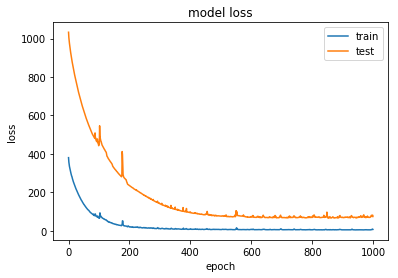

In [15]:
#stacked LSTMs, can do hyperparameter tuning
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(t_period))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit model
history = model.fit(train_X, train_y, epochs=1000, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / np.mean(y_true))) * 100

def standardized_rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))

yhat = model.predict(test_X, verbose=0)
mape = mean_absolute_percentage_error(test_y, yhat)
rmse = standardized_rmse(test_y, yhat)
print('MAPE: %.3f' % mape)
print('Test Standardized RMSE: %.3f' % rmse)

MAPE: 2.111
Test Standardized RMSE: 8.604
